# Linear Regression

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Preprocessing

We will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price.

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv') # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas

In [5]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

In [6]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """

    X = np.subtract(X, X.mean(axis=0))/ X.std(axis=0)
    y = np.subtract(y, np.mean(y))/ np.std(y)

    return X, y

In [7]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [8]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization


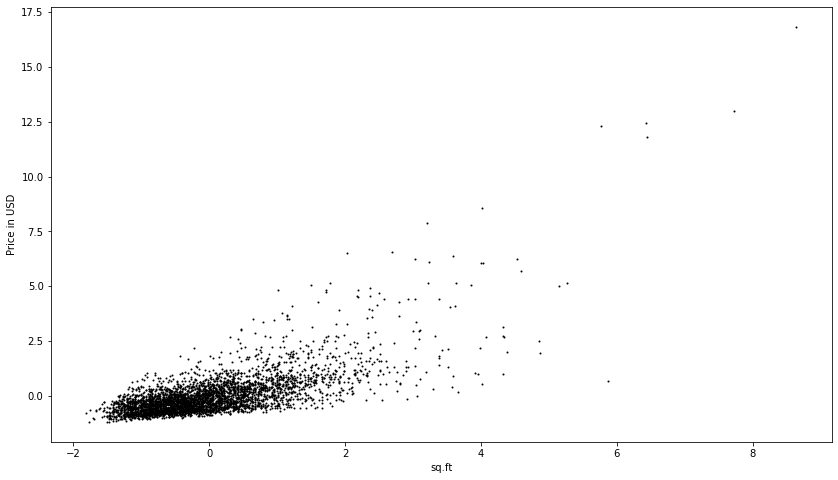

In [9]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

In [10]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
b1 = np.ones(np.shape(X_train)[0])
X_train = np.column_stack((b1, X_train))
b1 = np.ones(np.shape(X_val)[0])
X_val = np.column_stack((b1, X_val))
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

## Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.



In [11]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """

    m = len(X)
    h_theta = np.dot(X, theta)
    difference = np.square(np.subtract(h_theta, y))
    J = 1 / (2 * m) * np.sum(difference)

    return J

In [12]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas

    m = len(X)
    for i in range(num_iters):
        J_history.append(compute_cost(X, y, theta))
        h_theta = np.dot(X, theta)
        difference = np.subtract(h_theta, y)
        product = np.dot(X.T, difference) * alpha * (1 / m)
        theta = np.subtract(theta, product)

    return theta, J_history

In [14]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help us find problems with the code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations.

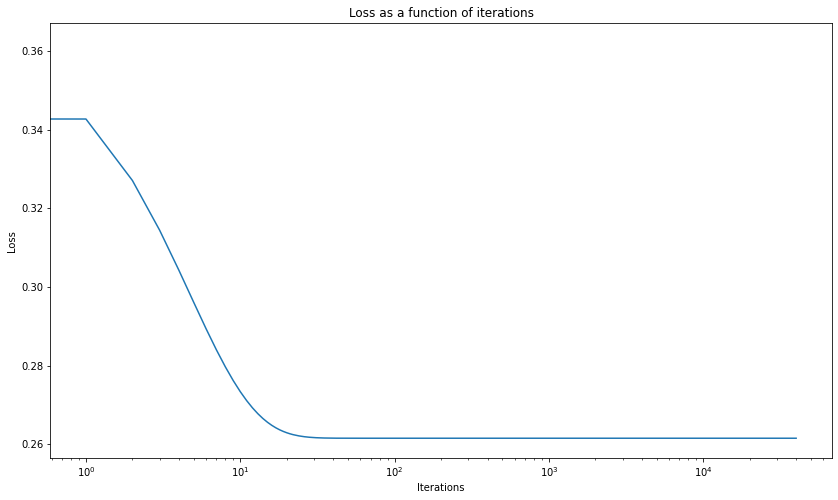

In [15]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

In [16]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.
    
    AX=B
    
    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """

    X_0 = np.dot(X.T,X)
    X_1 = np.linalg.inv(X_0)
    X_dager = np.dot(X_1,X.T)
    pinv_theta = np.dot(X_dager,y)

    return pinv_theta

In [19]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

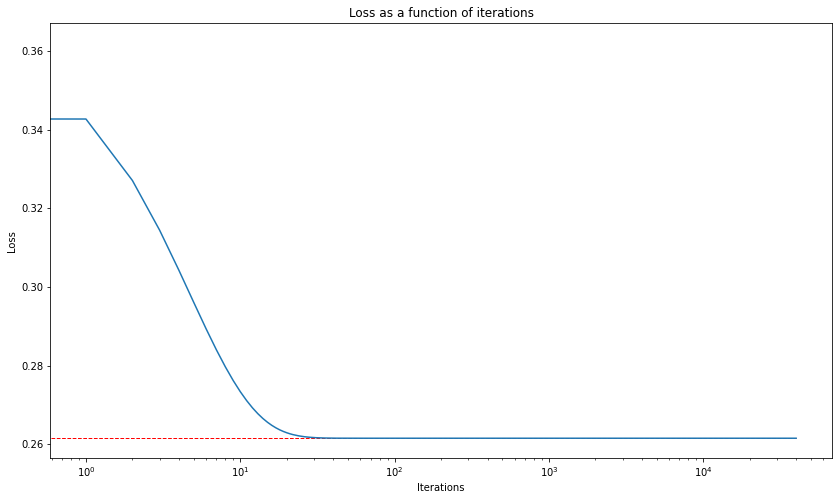

In [20]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next.

In [21]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas

    m = len(X)
    current = compute_cost(X, y, theta)
    prev = float('inf')
    while ((abs(current - prev) > 1e-8) and (num_iters > 0)):
        prev = current
        J_history.append(current)
        h_theta = np.dot(X, theta)
        difference = np.subtract(h_theta, y)
        product = np.dot(X.T, difference) * alpha * (1 / m)
        theta = np.subtract(theta, product)
        current = compute_cost(X, y, theta)
        num_iters -= 1

    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [22]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}

    initial_theta = np.array([1, 1])

    for alpha in alphas:
        theta, J_history = efficient_gradient_descent(X_train, y_train, initial_theta, alpha, iterations)
        cost = compute_cost(X_val, y_val, theta)
        alpha_dict[alpha] = cost

    return alpha_dict

In [23]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

C:\Users\liamb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-21-7a964a45ac05>:28: RuntimeWarning: invalid value encountered in double_scalars
  while ((abs(current - prev) > 1e-8) and (num_iters > 0)):


Obtain the best learning rate from the dictionary `alpha_dict`.

In [24]:
best_alpha = min(alpha_dict, key=alpha_dict.get)

print(best_alpha)

1


This is yet another sanity check. This function plots the regression lines of out model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data.

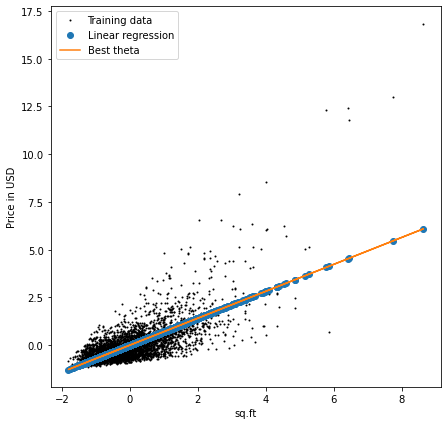

In [26]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')
plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Multivariate Linear Regression

In most cases, you will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote vectorized code, this part should be straightforward. If your code is not vectorized, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [27]:
# Read comma separated data
df = pd.read_csv('data.csv')

## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [28]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the **same** `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [29]:
# preprocessing
X, y = preprocess(X, y)

In [30]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data.

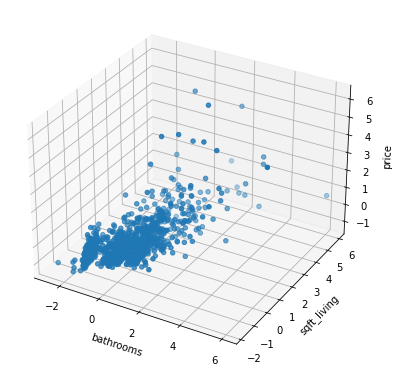

In [31]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [32]:

b1 = np.ones(np.shape(X_train)[0])
X_train = np.column_stack((b1, X_train))
b1 = np.ones(np.shape(X_val)[0])
X_val = np.column_stack((b1, X_val))

Make sure the functions `compute_cost` , `gradient_descent` , and `pinv`  work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model.

In [33]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [34]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
#overflow message due to find_best_alpha() - that is expected.
dict_a = find_best_alpha(X_train, y_train, X_val, y_val, iterations)
best_alpha = min(dict_a, key=dict_a.get)
theta, J_history = efficient_gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

C:\Users\liamb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-21-7a964a45ac05>:28: RuntimeWarning: invalid value encountered in double_scalars
  while ((abs(current - prev) > 1e-8) and (num_iters > 0)):
<ipython-input-11-33da1035e685>:20: RuntimeWarning: overflow encountered in square
  difference = np.square(np.subtract(h_theta, y))


In [35]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

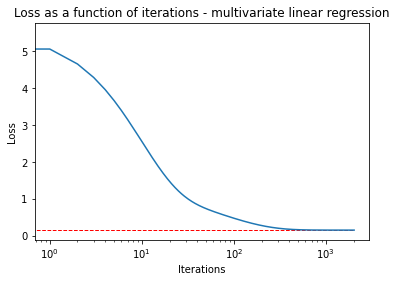

In [36]:
plt.plot(np.arange(len(J_history)), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Find best features for regression

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance.
Use forward and backward selection and find 4 features that best minimizes the loss. First, we will reload the dataset as a dataframe in order to access the feature names.

In [37]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)

### Forward Feature Selection

Complete the function `forward_selection`. Train the model using a single feature at a time, and choose the best feature using the validation dataset. Next, check which feature performs best when added to the feature you previously chose. Repeat this process until you reach 4 features + bias.

In [44]:
def forward_selection(X_train, y_train, X_val, y_val,alpha,num_iter):
    """
    Train the model using the training set using a single feature. 
    Choose the best feature according to the validation set. Next, 
    check which feature performs best when added to the feature
    you previously chose. Repeat this process until you reach 4 
    features and the bias. Don't forget the bias trick.

    Returns:
    - The names of the best features using forward selection.
    """
    np.random.seed(42)
    best_features = []

    theta_lists = [np.random.random(size=x) for x in range(2,6)]
    loss_min = {}
    bol = [False if x > 0 else True for x in range(18)]
    for i in range(4):
        for j in [x for x in range(1, 18) if x not in best_features]:
            bol[j] = True
            current_X_train = X_train[:, bol]
            current_X_val = X_val[:, bol]
            current_theta, _ = efficient_gradient_descent(current_X_train, y_train, theta_lists[i], alpha, num_iter)
            loss_min[j] = compute_cost(current_X_val, y_val, current_theta)
            bol[j] = False
        best_fet_iter = min(loss_min, key=loss_min.get)
        best_features.append(best_fet_iter)
        bol[best_fet_iter] = True
        loss_min.clear()
    for i in range(4):
        best_features[i] = all_features.columns[best_features[i]-1]

    return best_features

In [45]:
forward_selection(X_train, y_train, X_val, y_val, 0.1, 10000)

['sqft_living', 'lat', 'waterfront', 'grade']

### Backward Feature Selection

Train the model with all but one of the features at a time and remove the worst feature (the feature that its absence yields the best loss value using the validation dataset). Next, remove an additional feature along with the feature you previously removed. Repeat this process until you reach 4 features + bias. You are free to use any arguments you need.

In [46]:
def backward_selection(X_train, y_train, X_val, y_val,alpha,num_iter):
    """
    Train the model using the training set using all but one of the 
    features at a time. Remove the worst feature according to the 
    validation set. Next, remove an additional feature along with the 
    feature you previously removed. Repeat this process until you 
    reach 4 features and the bias. Don't forget the bias trick.

    Returns:
    - The names of the best features using backward selection.
    """
    np.random.seed(42)
    worst_features = []

    loss_max = {}
    theta_lists = [np.random.random(size=x) for x in range(18)]
    bol = [True for x in range(18)]
    for i in range(17, 4, -1):
        for j in [x for x in range(1, 18) if x not in worst_features]:
            bol[j] = False
            current_X_train = X_train[:, bol]
            current_X_val = X_val[:, bol]
            current_theta, _ = efficient_gradient_descent(current_X_train, y_train, theta_lists[i], alpha, num_iter)
            loss_max[j] = compute_cost(current_X_val, y_val, current_theta)
            bol[j] = True
        worst_fet_iter = min(loss_max, key=loss_max.get)
        worst_features.append(worst_fet_iter)
        bol[worst_fet_iter] = False
        loss_max.clear()
    best_features = []
    for i in range(1,len(bol)):
        if bol[i]:
            best_features.append(all_features.columns[i-1])

    return best_features

In [47]:
backward_selection(X_train, y_train, X_val, y_val, 0.1, 10000)

['sqft_living', 'waterfront', 'grade', 'lat']

## Adaptive Learning Rate

So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time. Implement the adaptive learning rate method based on the gradient descent algorithm above. 

**Your task is to find proper hyper-parameter values for the adaptive technique and compare this technique to the constant learning rate. Use clear visualizations of the validation loss and the learning rate as a function of the iteration**. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

In [42]:
theta = np.ones(X_train.shape[1])
def efficient_gradient_descent_Adaptive(X, y, theta, alpha,D, num_iters):
    """
    Learn the parameters of your model using the *training set* and stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. using Adaptive lerning rate.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - D: the hyper-parameter given to the Adaptive learning rate formula
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas

    m = len(X)
    current = compute_cost(X, y, theta)
    prev = float('inf')
    d = D
    counter = 1
    while ((abs(current - prev) > 1e-8) and (num_iters > 0)):
        prev = current
        J_history.append(current)
        h_theta = np.dot(X, theta)
        difference = np.subtract(h_theta, y)
        product = np.dot(X.T, difference) * alpha * (1 / m)
        theta = np.subtract(theta, product)
        current = compute_cost(X, y, theta)
        num_iters -= 1
        alpha = (alpha)/(1 + d * counter)
        counter +=1

    return theta, J_history

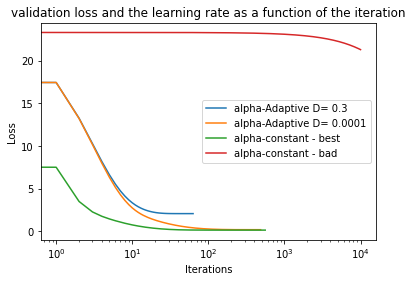

In [43]:
theta_adp_0, J_history_adp_0 = efficient_gradient_descent_Adaptive(X_train, y_train, theta, 0.03,0.01, 10000)
theta_adp_1, J_history_adp_1 = efficient_gradient_descent_Adaptive(X_train, y_train, theta, 0.03,0.0001, 10000)
theta_const_0,J_history_const_0 = efficient_gradient_descent(X_train, y_train, theta, 0.1, 10000)
theta_const_1,J_history_const_1 = efficient_gradient_descent(X_train, y_train, theta, 0.000001, 10000)
plt.plot(np.arange(len(J_history_adp_0)), J_history_adp_0,label ="alpha-Adaptive D= 0.3")
plt.plot(np.arange(len(J_history_adp_1)), J_history_adp_1,label ="alpha-Adaptive D= 0.0001")
plt.plot(np.arange(len(J_history_const_0)), J_history_const_0,label ="alpha-constant - best")
plt.plot(np.arange(len(J_history_const_1)), J_history_const_1,label ="alpha-constant - bad")
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('validation loss and the learning rate as a function of the iteration')
plt.legend()
plt.show()